**Name**- Aditya Singh Tomar

---


**Task**-Customer churn prediction

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [ ]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
pd.to_numeric(data.EstimatedSalary)

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [ ]:
pd.to_numeric(data.EstimatedSalary,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: EstimatedSalary, Length: 10000, dtype: bool

In [ ]:
data.shape

(10000, 11)

In [ ]:
data.iloc[488].EstimatedSalary

130486.57

In [ ]:
data[data.EstimatedSalary!=''].shape

(10000, 11)

In [ ]:
data = data[data.EstimatedSalary!='']
data.shape

(10000, 11)

In [ ]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data.EstimatedSalary = pd.to_numeric(data.EstimatedSalary)

In [ ]:
data.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
data.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
data[data.Exited==1].EstimatedSalary.values

array([101348.88, 113931.57, 149756.71, ...,  69384.71,  42085.58,
        92888.52])

In [ ]:
data[data.Exited==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


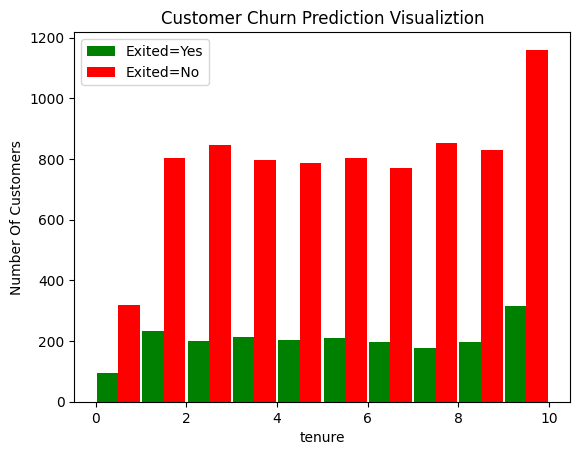

In [ ]:
tenure_churn_no = data[data.Exited==0].Tenure.values
tenure_churn_yes = data[data.Exited==1].Tenure.values
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 12]
blood_sugar_men_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(data)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
data.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [ ]:
yes_no_column = ['HasCrCard','IsActiveMember']
for col in yes_no_column:
    data[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for col in data.columns:
    print(f'{col}: {data[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [ ]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [ ]:
data['Geography'].replace({'France':2,'Germany':1,'Spain':0},inplace=True)

In [ ]:
data.Gender.unique()

array([0, 1])

In [ ]:
data=pd.get_dummies(data,drop_first=True)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3713,709,1,1,22,0,112949.71,1,0,0,155231.55,0
1416,585,0,0,33,8,0.00,2,1,0,114182.07,0
6511,628,2,0,50,4,143054.56,1,0,1,109608.81,1
8411,619,0,0,56,7,0.00,2,1,1,42442.21,0
7231,555,2,1,40,10,139930.18,1,1,1,105720.09,0


In [ ]:
data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [ ]:
for col in data.columns:
    print(f'{col}: {data[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [ ]:
X=data.drop('Exited',axis='columns')
y=data['Exited']

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(7000, 10)

In [ ]:
X_test.shape

(3000, 10)

In [ ]:
X_train[:10]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5795,0.718,2,1,0.283784,0.8,0.000000,2,1,0,0.281039
1407,0.742,2,1,0.689189,0.2,0.432144,1,1,1,0.892119
3525,0.550,1,1,0.175676,0.4,0.309859,2,1,0,0.376656
5333,0.734,0,1,0.202703,0.1,0.395008,1,0,0,0.972371
233,0.834,1,1,0.027027,0.3,0.477143,2,0,1,0.750691
6030,0.274,0,1,0.202703,0.8,0.580832,1,1,0,0.206791
8097,0.552,2,0,0.459459,0.0,0.000000,2,1,0,0.160755
8377,0.904,0,1,0.297297,0.4,0.000000,2,1,1,0.409522
1286,0.458,0,1,0.256757,0.5,0.606672,2,0,0,0.601095
3185,0.604,1,0,0.364865,0.9,0.441723,1,1,1,0.766933


In [ ]:
len(X_train.columns)

10

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5157 - accuracy: 0.7871
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.8000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8011
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8080
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8149
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8194
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4228 - accuracy: 0.8226
Epoch 8/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8207
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8259
Epoch 10/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4050 - accura

In [ ]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 3ms/step - loss: 0.3633 - accuracy: 0.8490


[0.36333897709846497, 0.8489999771118164]

In [ ]:
yp=model.predict(X_test)
yp[:5]

94/94 [==============================] - 0s 1ms/step


array([[0.11683559],
       [0.35324794],
       [0.8048258 ],
       [0.01884231],
       [0.5727718 ]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 1, 0, 1, 1, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2363
           1       0.81      0.38      0.52       637

    accuracy                           0.85      3000
   macro avg       0.83      0.68      0.71      3000
weighted avg       0.84      0.85      0.83      3000



Text(95.72222222222221, 0.5, 'Truth')

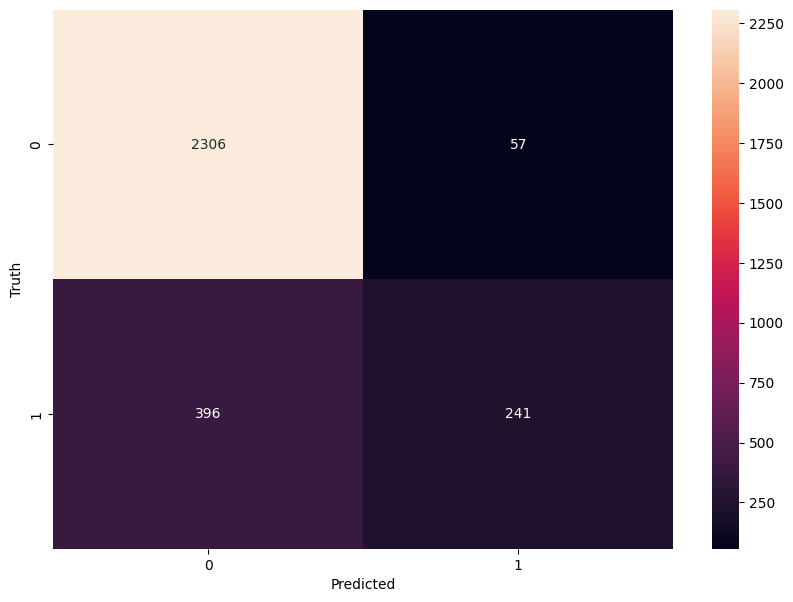

In [ ]:
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_test.shape

(3000,)

In [ ]:
round((862+229)/(862+229+137+179),2)

0.78

In [ ]:
round(229/(229+137),2)

0.63

In [ ]:
round(862/(862+137),2)

0.86

In [ ]:
round (229/(229+179),2)

0.56